In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# Load the training dataset
file_path = "01 train data.csv"
data = pd.read_csv(file_path)

In [45]:
# Ignore rows with null/empty values in Placement Status column
data = data.dropna(subset=['Placement Status'])


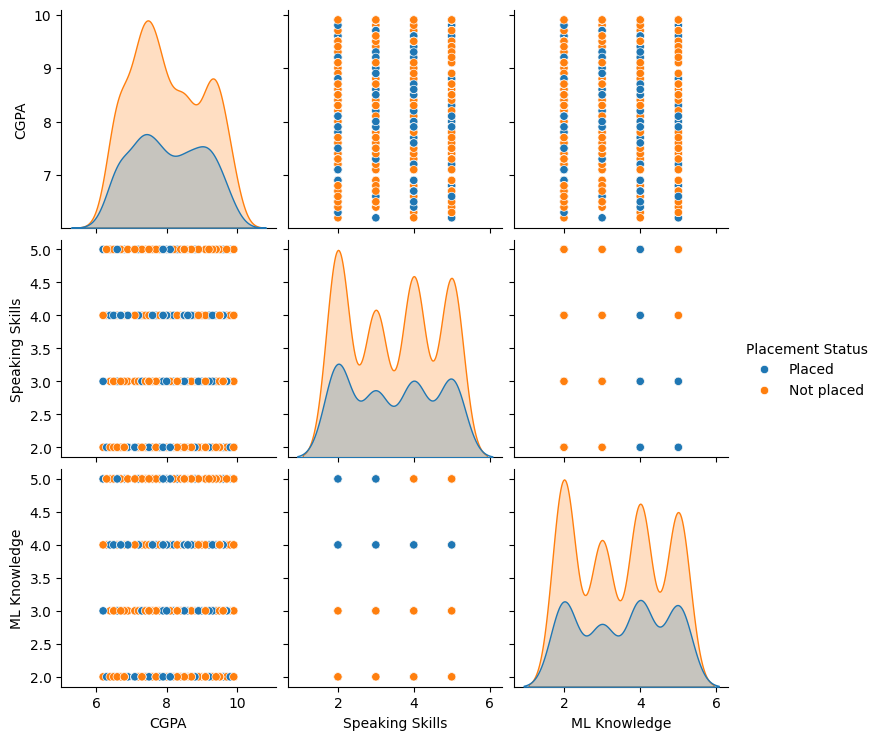

In [48]:
# EDA for the selected columns
selected_columns = ['CGPA', 'Speaking Skills', 'ML Knowledge', 'Placement Status']
selected_data = data[selected_columns]
# Pairplot for visualization
sns.pairplot(selected_data, hue='Placement Status', diag_kind='kde')
plt.show()

In [49]:
# Define independent variables (features) and dependent variable (target)
X = data[['CGPA', 'Speaking Skills', 'ML Knowledge']]
y = data['Placement Status']

In [50]:
# Train Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X, y)
logistic_regression_predictions = logistic_regression_model.predict(X)
logistic_regression_accuracy = accuracy_score(y, logistic_regression_predictions)

# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X, y)
decision_tree_predictions = decision_tree_model.predict(X)
decision_tree_accuracy = accuracy_score(y, decision_tree_predictions)

# Train Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X, y)
random_forest_predictions = random_forest_model.predict(X)
random_forest_accuracy = accuracy_score(y, random_forest_predictions)

# Train SVM model
svm_model = SVC()
svm_model.fit(X, y)
svm_predictions = svm_model.predict(X)
svm_accuracy = accuracy_score(y, svm_predictions)

In [51]:
# Print accuracy for each model
print(f"Logistic Regression Model Accuracy: {logistic_regression_accuracy:.2f}")
print(f"Decision Tree Model Accuracy: {decision_tree_accuracy:.2f}")
print(f"Random Forest Model Accuracy: {random_forest_accuracy:.2f}")
print(f"SVM Model Accuracy: {svm_accuracy:.2f}")

Logistic Regression Model Accuracy: 0.67
Decision Tree Model Accuracy: 0.72
Random Forest Model Accuracy: 0.72
SVM Model Accuracy: 0.67


In [52]:
# Load the test dataset
test_file_path = "02 Test Data.csv"
test_data = pd.read_csv(test_file_path)

# Extract features from the test dataset
X_test = test_data[['CGPA', 'Speaking Skills', 'ML Knowledge']]

# Use the trained Random Forest model to make predictions
rf_predictions = random_forest_model.predict(X_test)

# Fill the empty 'Placement Status' column in the test dataset with predictions
test_data['Placement Status'] = rf_predictions

# Save the updated test dataset with filled 'Placement Status' column
updated_test_file_path = "Prediction of Placement Status Data/02 Test Data Updated.csv"
test_data.to_csv(updated_test_file_path, index=False)

print("Test dataset updated and saved with Random Forest predictions.")


Test dataset updated and saved with Random Forest predictions.
